In [2]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('C:/Users/manit/OneDrive/Desktop/P6/Dataset.csv')

In [5]:
df.head()

Patient ID   TypicalAnginal_ChestPainType  AtypicalAnginal_ChestPainType  \
0            1                             0                              1   
1            2                             0                              0   
2            3                             0                              1   
3            4                             0                              0   
4            5                             0                              0   

   NonAnginal_ChestPainType  Asymptomatic_ChestPainType  RestingBP  \
0                         0                           0        140   
1                         1                           0        160   
2                         0                           0        130   
3                         0                           1        138   
4                         1                           0        150   

   Cholesterol  FastingBS  Normal_RestingECG  ST_RestingECG  ...  \
0          289          0                  1              0  ...   
1          180          0                  1              0  ...   
2          283          0                  0              1  ...   
3          214          0                  1              0  ...   
4          195          0                  1              0  ...   

   creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  \
0                       582         0                 20                    1   
1                      7861         0                 38                    0   
2                       146         0                 20                    0   
3                       111         0                 20                    0   
4                       160         1                 20                    0   

   platelets  serum_creatinine  serum_sodium  smoking  time  DEATH_EVENT  
0  265000.00               1.9           130        0     4            1  
1  263358.03               1.1           136        0     6            1  
2  162000.00               1.3           129        1     7            1  
3  210000.00               1.9           137        0     7            1  
4  327000.00               2.7           116        0     8            1  

[5 rows x 31 columns]

In [6]:
df.shape

(299, 31)

In [7]:
df.describe()

Patient ID   TypicalAnginal_ChestPainType  \
count   299.000000                    299.000000   
mean    150.000000                      0.040134   
std      86.458082                      0.196602   
min       1.000000                      0.000000   
25%      75.500000                      0.000000   
50%     150.000000                      0.000000   
75%     224.500000                      0.000000   
max     299.000000                      1.000000   

       AtypicalAnginal_ChestPainType  NonAnginal_ChestPainType  \
count                     299.000000                299.000000   
mean                        0.351171                  0.180602   
std                         0.478136                  0.385333   
min                         0.000000                  0.000000   
25%                         0.000000                  0.000000   
50%                         0.000000                  0.000000   
75%                         1.000000                  0.000000   
max                         1.000000                  1.000000   

       Asymptomatic_ChestPainType   RestingBP  Cholesterol   FastingBS  \
count                  299.000000  299.000000   299.000000  299.000000   
mean                     0.428094  132.274247   242.207358    0.090301   
std                      0.495632   17.745546    75.102908    0.287093   
min                      0.000000   92.000000     0.000000    0.000000   
25%                      0.000000  120.000000   201.000000    0.000000   
50%                      0.000000  130.000000   237.000000    0.000000   
75%                      1.000000  140.000000   277.000000    0.000000   
max                      1.000000  200.000000   603.000000    1.000000   

       Normal_RestingECG  ST_RestingECG  ...  creatinine_phosphokinase  \
count         299.000000     299.000000  ...                299.000000   
mean            0.802676       0.177258  ...                581.839465   
std             0.398646       0.382527  ...                970.287881   
min             0.000000       0.000000  ...                 23.000000   
25%             1.000000       0.000000  ...                116.500000   
50%             1.000000       0.000000  ...                250.000000   
75%             1.000000       0.000000  ...                582.000000   
max             1.000000       1.000000  ...               7861.000000   

         diabetes  ejection_fraction  high_blood_pressure      platelets  \
count  299.000000         299.000000           299.000000     299.000000   
mean     0.418060          38.083612             0.351171  263358.029264   
std      0.494067          11.834841             0.478136   97804.236869   
min      0.000000          14.000000             0.000000   25100.000000   
25%      0.000000          30.000000             0.000000  212500.000000   
50%      0.000000          38.000000             0.000000  262000.000000   
75%      1.000000          45.000000             1.000000  303500.000000   
max      1.000000          80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium    smoking        time  DEATH_EVENT  
count         299.00000    299.000000  299.00000  299.000000    299.00000  
mean            1.39388    136.625418    0.32107  130.260870      0.32107  
std             1.03451      4.412477    0.46767   77.614208      0.46767  
min             0.50000    113.000000    0.00000    4.000000      0.00000  
25%             0.90000    134.000000    0.00000   73.000000      0.00000  
50%             1.10000    137.000000    0.00000  115.000000      0.00000  
75%             1.40000    140.000000    1.00000  203.000000      1.00000  
max             9.40000    148.000000    1.00000  285.000000      1.00000  

[8 rows x 31 columns]

In [8]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(16)

Total records =  299


Total Missing  In Percent
Patient ID                            0         0.0
Down_STSlope                          0         0.0
time                                  0         0.0
smoking                               0         0.0
serum_sodium                          0         0.0
serum_creatinine                      0         0.0
platelets                             0         0.0
high_blood_pressure                   0         0.0
ejection_fraction                     0         0.0
diabetes                              0         0.0
creatinine_phosphokinase              0         0.0
anaemia                               0         0.0
Sex                                   0         0.0
Age                                   0         0.0
HeartDisease                          0         0.0
Flat_STSlope                          0         0.0

<AxesSubplot:>

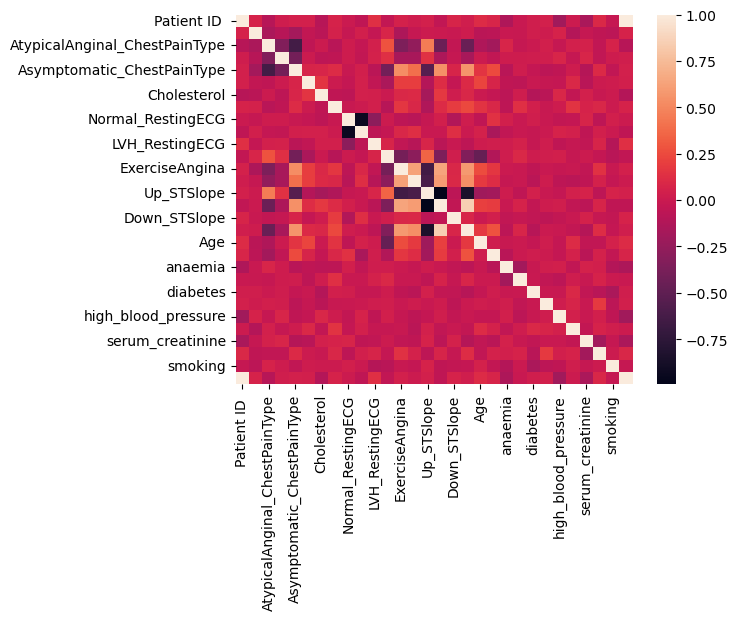

In [9]:
import seaborn as sns

corr = df.select_dtypes("number").drop(columns = ["DEATH_EVENT"]).corr()
sns.heatmap(corr)

In [10]:
features=df.copy()

In [11]:
X = features.drop('DEATH_EVENT', axis=1)
Y = features['DEATH_EVENT']

In [12]:
Y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train, Y_train)

LogisticRegression()

In [16]:
Y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.85
Confusion Matrix:
[[39  4]
 [ 5 12]]


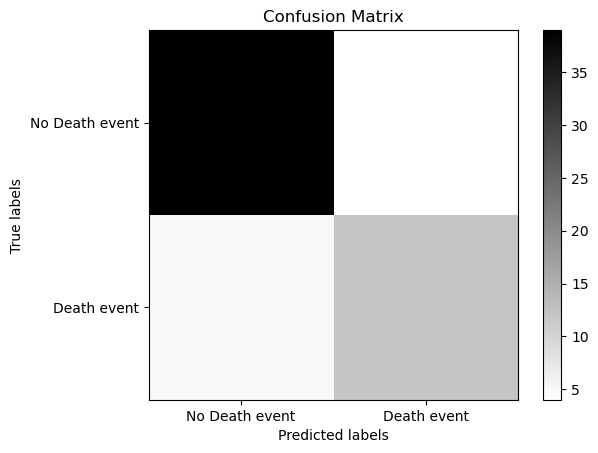

In [18]:
plt.imshow(confusion, cmap='binary')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1], ["No Death event", "Death event"])
plt.yticks([0, 1], ["No Death event", "Death event"])
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


In [20]:
import statsmodels.api as sm

In [22]:
model1 = sm.Logit(Y, X).fit()

         Current function value: 0.343689
         Iterations: 35


C:\Users\manit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
print(model1.pvalues)

Patient ID                       0.033805
TypicalAnginal_ChestPainType     1.000000
AtypicalAnginal_ChestPainType    1.000000
NonAnginal_ChestPainType         1.000000
Asymptomatic_ChestPainType       1.000000
RestingBP                        0.635159
Cholesterol                      0.813464
FastingBS                        0.489444
Normal_RestingECG                1.000000
ST_RestingECG                    1.000000
LVH_RestingECG                   0.999999
MaxHR                            0.245812
ExerciseAngina                   0.366202
Oldpeak                          0.892935
Up_STSlope                       1.000000
Flat_STSlope                     1.000000
Down_STSlope                     0.999999
HeartDisease                     0.887358
Age                              0.539130
Sex                              0.972954
anaemia                          0.974027
creatinine_phosphokinase         0.271566
diabetes                         0.908529
ejection_fraction                0